In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# constants
k_b = 1.381e-23

In [38]:
# standard error:
def getStandardError(column):
   
    n = len(column)
    standard_error = []
    squares = []
    
    for i in range(n):
        temp_square = column[i]**2
        squares.append(temp_square)
        
    squaredMean = np.mean(column)**2
    meanOfSquares = np.mean(squares)
    
    prefactor = 1/(np.sqrt(n-1))
    
    standard_error = prefactor * np.sqrt(meanOfSquares - squaredMean)
    
    return standard_error
    

In [39]:
bruh = [5,5,5,5]

getStandardError(bruh)

0.0

In [40]:
import os

# Function to read files in a folder and its subfolders
def getG_dict(root_folder):
    
    G_dict = {}
    
    for root, dirs, files in os.walk(root_folder):
        
        
        G = []
        G_err = []
        r_correlation = []
        
        for file_name in files:
            file_path = os.path.join(root, file_name)
            # Here you can perform actions on each file, such as reading its contents
            
            df = pd.read_csv(file_path)
            temp_r = df['r_correlation'][0]
            temp_G = np.mean(df['G'])
            
            temp_G_err = getStandardError(df['G'])
            
            
            beta = df['beta'][0]
            
            # G.append(temp_G)
            # r_correlation.append(temp_r)
            
            if beta not in G_dict:
                G_dict[beta] = {'r_correlation': [], 'G': [], 'G_err': []}
            
            G_dict[beta]['r_correlation'].append(temp_r)
            G_dict[beta]['G'].append(temp_G)
            G_dict[beta]['G_err'].append(temp_G_err)
            
            
            # print(f"file_name = {file_path}")
        
    return G_dict



In [41]:
G_dict = getG_dict('task5_data')

In [42]:
# dictionary sorter
def getSorted_dict(G_dict):
    sorted_keys = sorted(G_dict, key=lambda x: abs(x))

    print(sorted_keys)

    # Create a new dictionary with sorted keys
    sorted_dict = {key: G_dict[key] for key in sorted_keys}
    
    return sorted_dict


In [43]:
def getG_plot(G_dict):
    
    plt.figure(figsize=(8, 6))  # Width, Height in inches
    
    for beta in G_dict:
        
        r_correlation = G_dict[beta]['r_correlation']
        G = G_dict[beta]['G']
        G_err = G_dict[beta]['G_err']
        
        
        
        # plt.plot(r_correlation, G, linestyle="", marker='o', label=beta)
        plt.errorbar(r_correlation, G, yerr=G_err, fmt='o', capsize=3,  label=beta)
        plt.tick_params(axis='both', direction='in')
        plt.legend()
        
        plt.xlabel("Distance between particles $r_{ij}$")
        plt.ylabel("Correlation function $G_{ij}$")
        
        plt.savefig("figures/task5.png")

    return
        

[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]


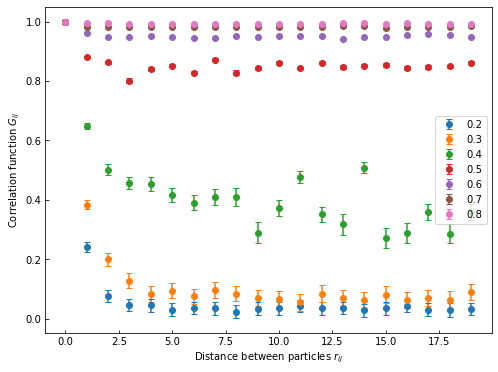

In [44]:
G_dict = getSorted_dict(G_dict)

getG_plot(G_dict)